# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("<Your answer here>")

<Your answer here>


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [20]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [3]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df_test.describe()


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().mean()
# Есть)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.028861
engine           0.028861
max_power        0.028004
torque           0.029004
seats            0.028861
dtype: float64

In [9]:
df_test.isna().mean()

name             0.000
year             0.000
selling_price    0.000
km_driven        0.000
fuel             0.000
seller_type      0.000
transmission     0.000
owner            0.000
mileage          0.019
engine           0.019
max_power        0.019
torque           0.019
seats            0.019
dtype: float64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
df_train.drop(['selling_price'], axis=1).duplicated().mean()

0.1655950850121446

In [11]:
df_test.drop(['selling_price'], axis=1).duplicated().mean()

0.069

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
df_train[df_train.drop(['selling_price'], axis=1).duplicated()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [13]:
df_test[df_test.drop(['selling_price'], axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
221,Volkswagen Vento 1.5 Highline Plus AT 16 Alloy,2018,885000,75000,Diesel,Individual,Automatic,First Owner,21.5 kmpl,1498 CC,108.5 bhp,250Nm@ 1500-3000rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [21]:
df_train.drop_duplicates(
    subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'], 
    keep='first', 
    inplace=True, 
    ignore_index=False
    )

In [22]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
# Уже
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [23]:
def norm_vid(x, i):
    try:
        return float(str(x)[:-i])
    except:
        return np.nan



df_test['max_power'] = df_test['max_power'].apply(lambda x: norm_vid(x, -3))
df_train['max_power'] = df_train['max_power'].apply(lambda x: norm_vid(x, -3))
df_test['engine'] = df_test['engine'].apply(lambda x: norm_vid(x, -3))
df_train['engine'] = df_train['engine'].apply(lambda x: norm_vid(x, -3))
df_test['mileage'] = df_test['mileage'].apply(lambda x: norm_vid(x, -5))
df_train['mileage'] = df_train['mileage'].apply(lambda x: norm_vid(x, -5))

df_test = df_test.drop(['torque'], axis=1)
df_train = df_train.drop(['torque'], axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
df_train.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.035103
engine           0.031849
max_power        0.031507
seats            0.031849
dtype: float64

In [26]:
kk = df_train[['mileage', 'engine', 'max_power', 'seats']].median()

df_train[['mileage', 'engine', 'max_power', 'seats']] = df_train[['mileage', 'engine', 'max_power', 'seats']].fillna(kk)
df_test[['mileage', 'engine', 'max_power', 'seats']] = df_test[['mileage', 'engine', 'max_power', 'seats']].fillna(kk)

In [27]:
df_train.isna().mean()

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
seats            0.0
dtype: float64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
df_train.groupby('seats').count()['name']


seats
2.0        2
4.0       94
5.0     4618
6.0       48
7.0      800
8.0      191
9.0       68
10.0      18
14.0       1
Name: name, dtype: int64

In [28]:
print("Потому что по местам можно оттследить +- категорию машины - 4 месте (значит обычная тачка), а вот если 14 (значит чтот либо техническое, либо что-то стремное). + возможно ложная корреляция этого приднака с другими может несильно так сдвинуть коэфы")

Потому что по местам можно оттследить +- категорию машины - 4 месте (значит обычная тачка), а вот если 14 (значит чтот либо техническое, либо что-то стремное). + возможно ложная корреляция этого приднака с другими может несильно так сдвинуть коэфы


In [30]:
df_train.engine = df_train.engine.astype(int)
df_test.engine = df_test.engine.astype(int)


df_train.seats = df_train.seats.astype(int)
df_test.seats = df_test.seats.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

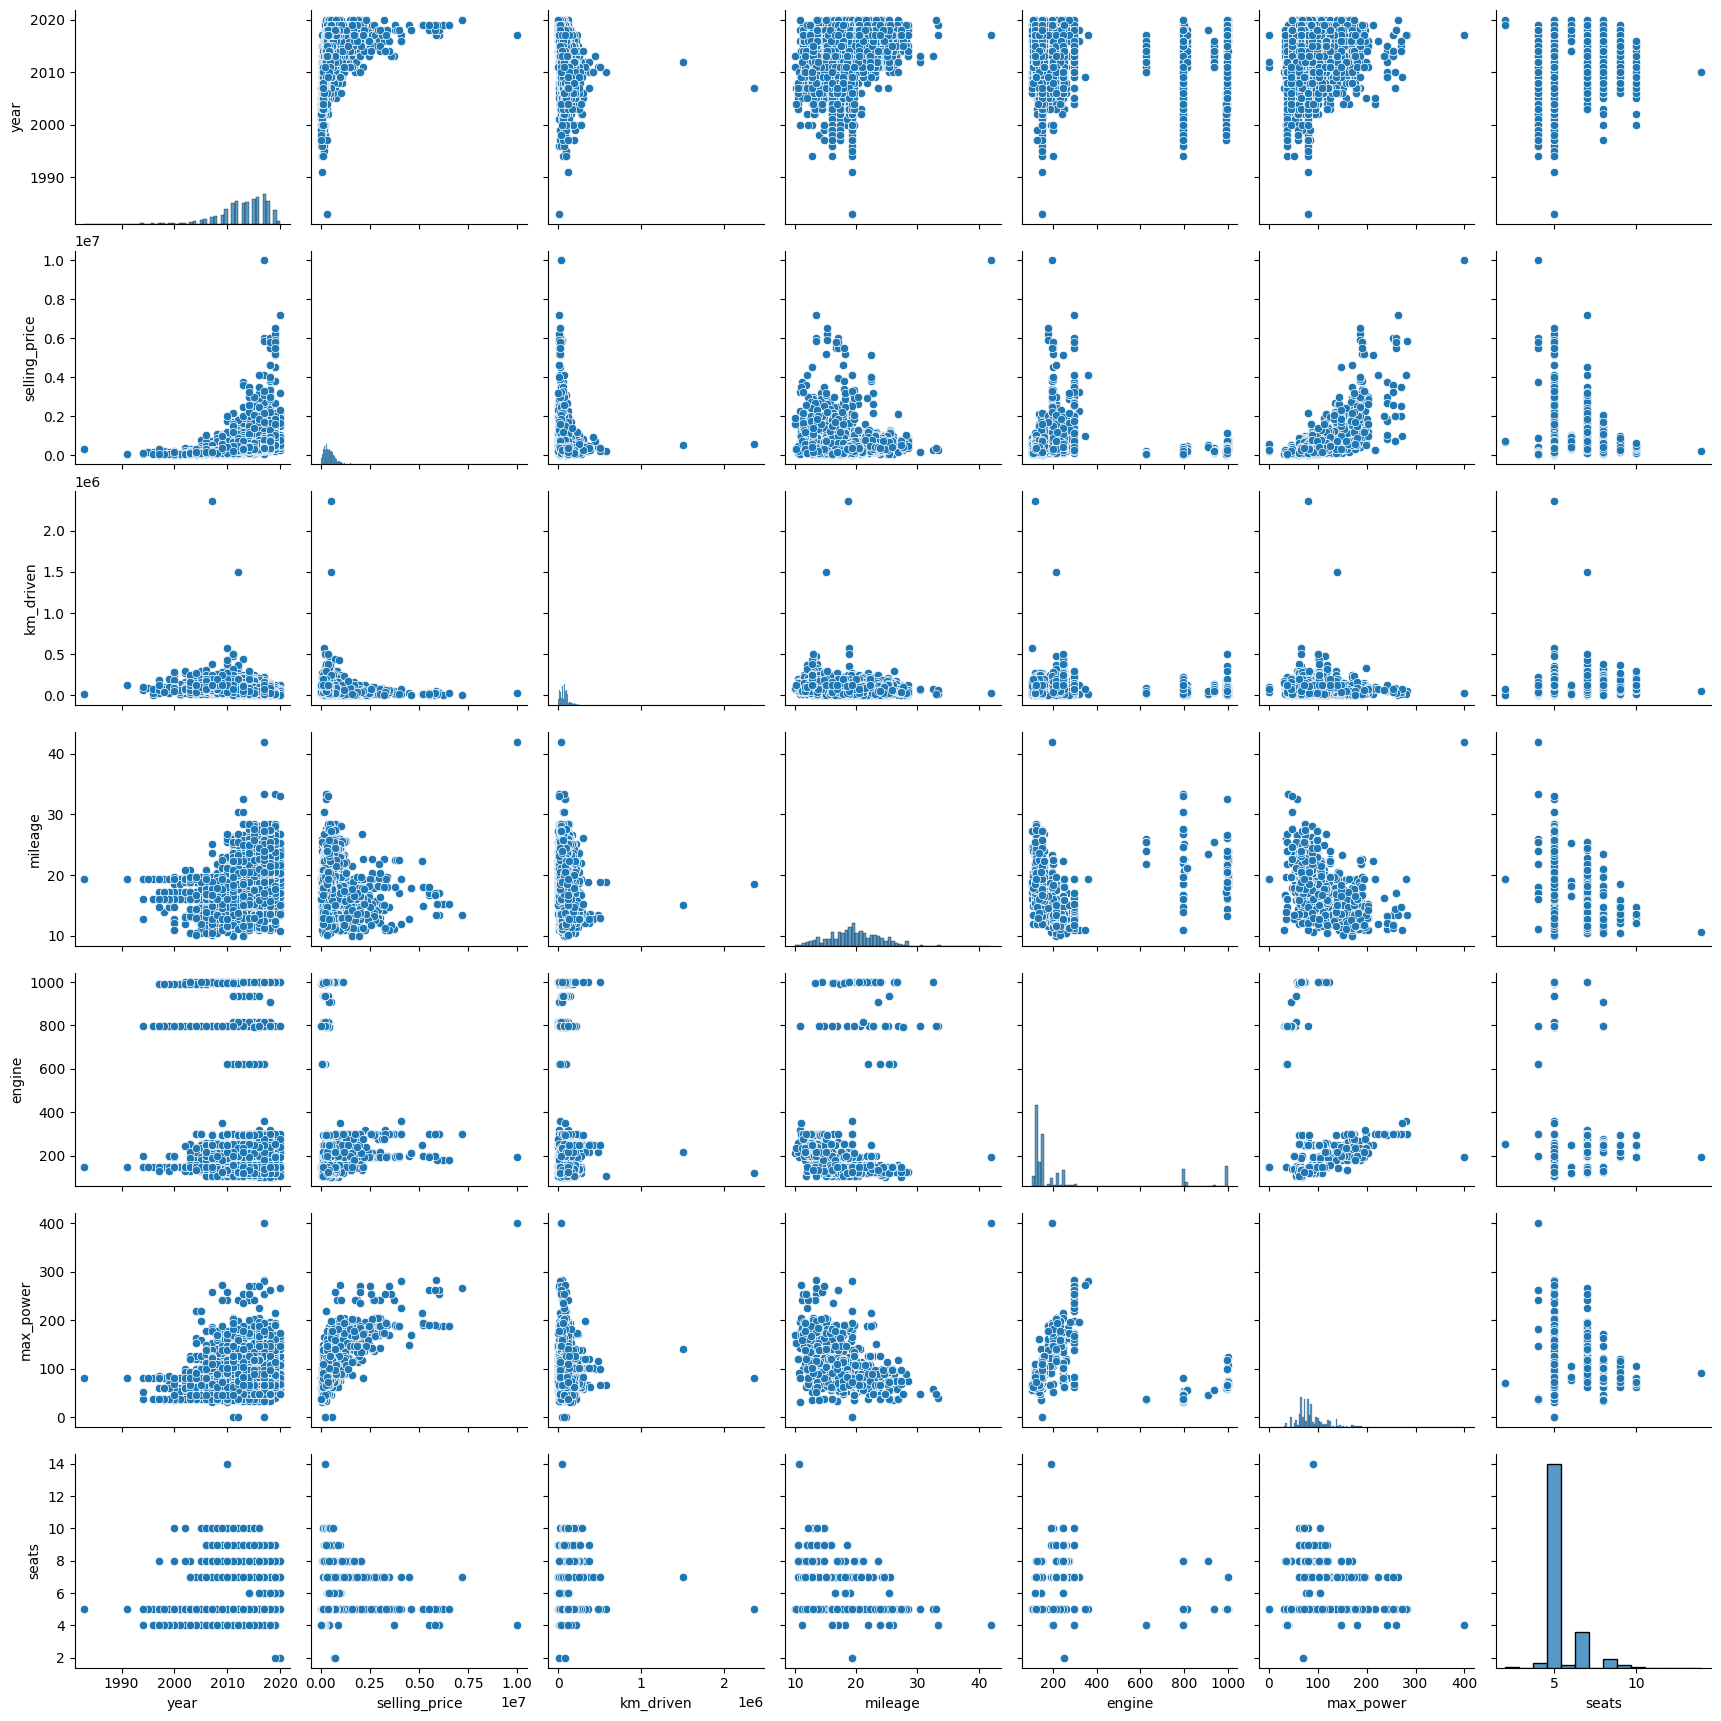

In [31]:
import seaborn as sns

sns.pairplot(df_train);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [ ]:
year - чем новее машинка, чем дороже продают
km_driven - чем меньше пробеш, тем дороже
mileage - что-то нормальное относительно среднего в 20
engine - не эстет, но тут в районе 200 что-то
max_power - чем мщнее тем дороже)
seats - как и говорил - сложно что-то сказать

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

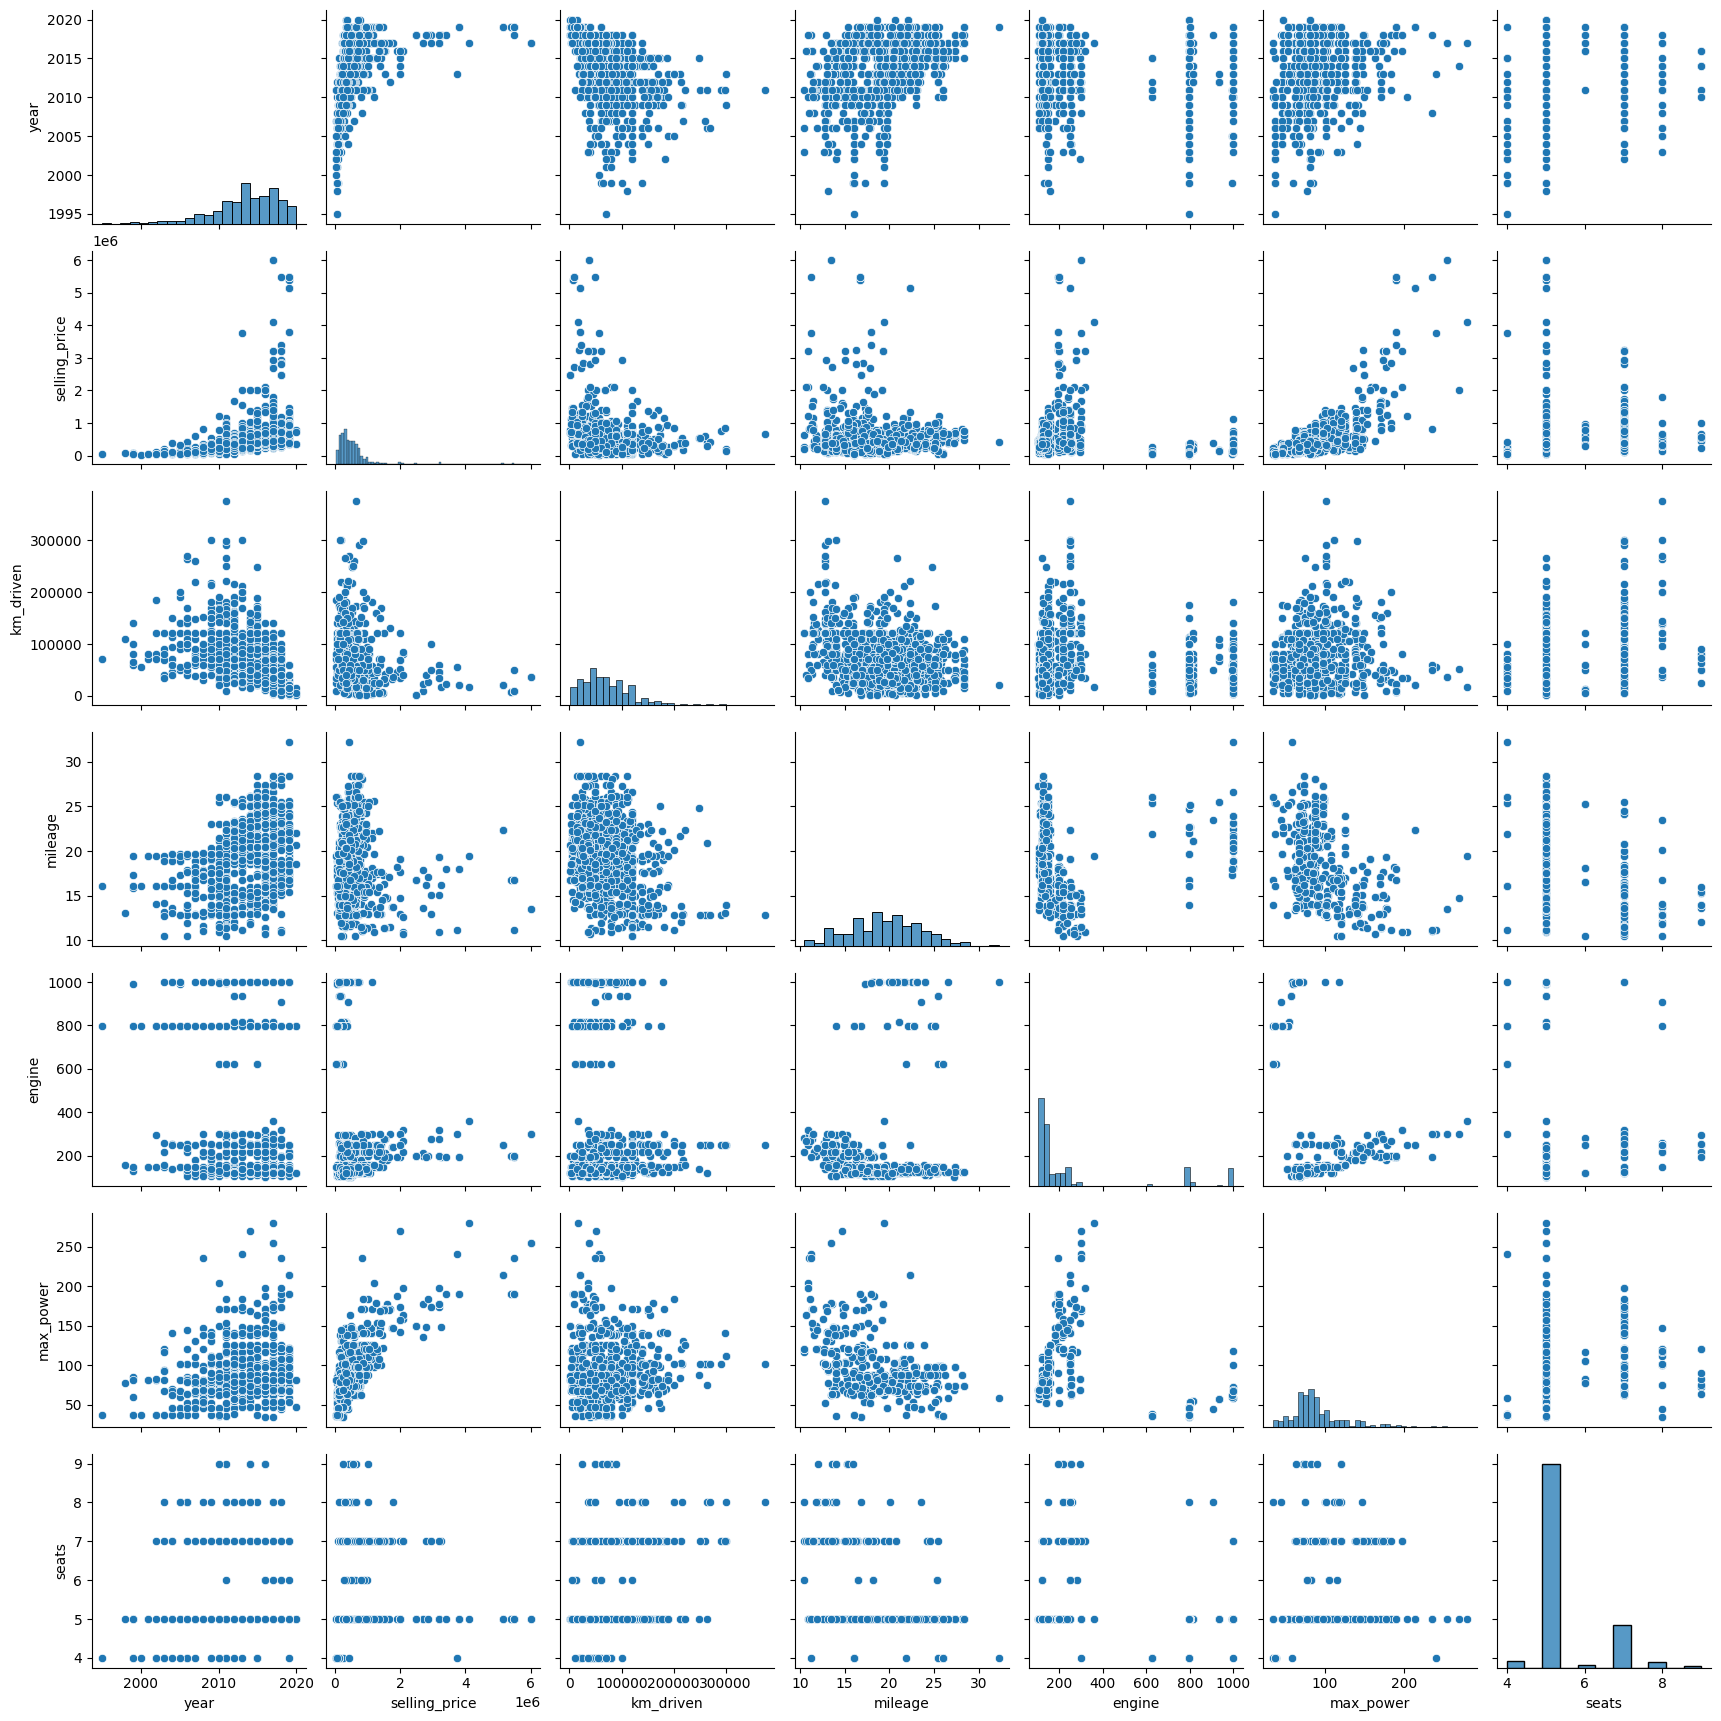

In [32]:
sns.pairplot(df_test);

In [ ]:
km_driven - уже не так очевидно 
в mileage тоже чет нормальность пропала

но вроде не особо существенно, так что вроде все норм

In [35]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,124,74.0,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,149,103.0,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,139,90.0,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,129,88.0,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,119,81.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,108,62.0,5
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.0,5
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,119,82.0,5
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,149,110.0,5


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

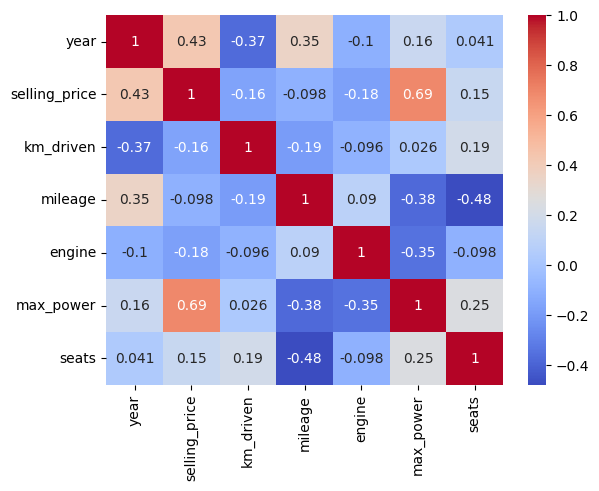

In [36]:
sns.heatmap(df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr(), cmap='coolwarm',  annot=True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font> - km_driven и max_power
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font> max_power и selling_price
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font> - по хитмапке точно сказать нельзя, нужно проверять стат тестами)))

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

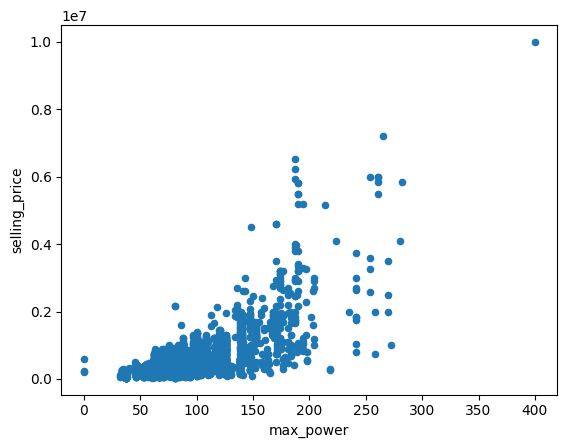

In [37]:
df_train.plot.scatter (x = 'max_power', y = 'selling_price');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

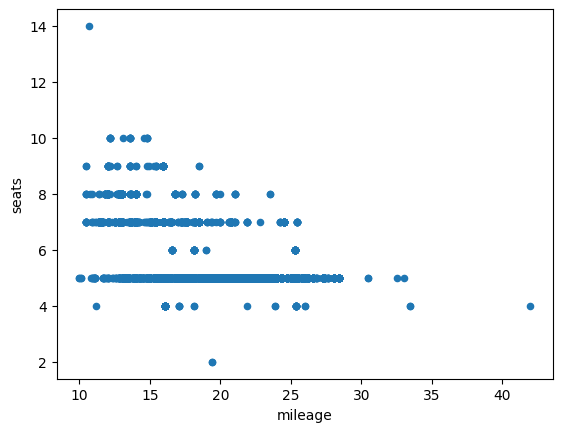

In [38]:
df_train.plot.scatter (x = 'mileage', y = 'seats');
# Вот над такой штукой надо бы подумать - либо в категориальные признаки онвертить, либо просто не брать в предсказание признак сиатс чтоб не сбивал коэфы

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [132]:
y_train = df_train['selling_price']
X_train = df_train.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [40]:
assert X_train.shape == (5840, 6)

In [41]:
y_test = df_test['selling_price']
X_test = df_test.drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [42]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression().fit(X_train, y_train)

print("R^2 = ", r2_score(lr.predict(X_test), y_test))
print("MSE = ", MSE(lr.predict(X_test), y_test))

R^2 =  -0.10077457615901686
MSE =  227933182712.9093


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression().fit(X_train, y_train)
print("R^2 = ", r2_score(lr.predict(X_test), y_test))
print("MSE = ", MSE(lr.predict(X_test), y_test))

R^2 =  -75441405.2629064
MSE =  9167713299941388.0


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [47]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [45]:
lr.coef_

# год выпуска)

array([154242.56373212, -32545.30632404,  26357.20145995,  45480.10570125,
       371914.66393135,   5830.08149635])

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

ls = Lasso().fit(X_train, y_train)
print("R^2 = ", r2_score(ls.predict(X_test), y_test))
print("MSE = ", MSE(ls.predict(X_test), y_test))


R^2 =  -3079279.0534773534
MSE =  5948894222271390.0


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
ls.coef_
# nope

array([154243.17202799, -32544.29204921,  26354.47005496,  45478.54945966,
       371912.50683207,   5827.93516859])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [52]:
%%time
from sklearn.model_selection import GridSearchCV

ls = Lasso()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 45, 1000, 1000000, 10000]}
clf = GridSearchCV(ls, parameters, cv = 10)
clf = clf.fit(X_train, y_train)

CPU times: user 485 ms, sys: 0 ns, total: 485 ms
Wall time: 484 ms


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [53]:
clf.best_params_

{'alpha': 10000}

In [54]:
ls = Lasso(alpha=10000).fit(X_train, y_train)
print("R^2 = ", r2_score(ls.predict(X_test), y_test))
print("MSE = ", MSE(ls.predict(X_test), y_test))


R^2 =  -3387788.774311121
MSE =  5986683475379122.0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [55]:
import warnings
warnings.filterwarnings('ignore')


In [56]:
from sklearn.linear_model import ElasticNet

ls = ElasticNet()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 45, 1000, 1000000, 10000],
             'l1_ratio' : [0, 0.2, 0.5, 0.8, 1],
             }
clf = GridSearchCV(ls, parameters, cv = 10)
clf = clf.fit(X_train, y_train)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [57]:
clf.best_params_

{'alpha': 0.6, 'l1_ratio': 0.8}

In [58]:
ls = ElasticNet(alpha=0.6, l1_ratio = 0.8).fit(X_train, y_train)
print("R^2 = ", r2_score(ls.predict(X_test), y_test))
print("MSE = ", MSE(ls.predict(X_test), y_test))

R^2 =  -3160638.6298015853
MSE =  5347337857867485.0


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [158]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

In [121]:
assert X_train_cat.shape == (5840, 10)

In [65]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [135]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_final = X_train_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.fit_transform(X_train_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
X_test_final =  X_test_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.transform(X_test_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))

In [143]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_final = X_train_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.fit_transform(X_train_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
X_test_final =  X_test_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.transform(X_test_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


ls = Ridge()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 45, 1000, 1000000, 10000]
             }
clf = GridSearchCV(ls, parameters, cv = 10, scoring='r2')
clf = clf.fit(X_train_final, y_train)

In [145]:
clf.best_score_

0.6212878808820713

In [146]:
clf.best_params_

{'alpha': 100}

In [147]:
ls = Ridge(alpha=100).fit(X_train_final, y_train)

print("R^2 = ", r2_score(ls.predict(X_test_final), y_test))
print("MSE = ", MSE(ls.predict(X_test_final), y_test))

# Безспорно стало лучшЕ!)

R^2 =  0.09494012769749849
MSE =  211529971321.5222


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [208]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat['year_x_2'] = X_train_cat['year']*2
X_test_cat['year_x_2'] = X_test_cat['year']*2

X_train_cat['max_power_x_2'] = X_train_cat['max_power']*2
X_test_cat['max_power_x_2'] = X_test_cat['max_power']*2

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_final = X_train_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.fit_transform(X_train_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
X_test_final =  X_test_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.transform(X_test_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

ls = Ridge()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 45, 1000, 1000000, 10000]
             }
clf = GridSearchCV(ls, parameters, cv = 10, scoring='r2')
clf = clf.fit(X_train_final, y_train)

In [209]:
clf.best_params_

{'alpha': 1000}

In [211]:
ls_best = Ridge(alpha=1000).fit(X_train_final, y_train)

print("R^2 = ", r2_score(ls_best.predict(X_test_final), y_test))
print("MSE = ", MSE(ls_best.predict(X_test_final), y_test))

# Ладно, хоть там и есть нелинейная зависимость, но мультиколлиниарность все порушила

R^2 =  -0.023218201060345223
MSE =  217077991298.9299


Воспользуемся РСА

In [159]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_final = X_train_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.fit_transform(X_train_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
X_test_final =  X_test_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.transform(X_test_cat[['seats', 'transmission', 'owner', 'seller_type', 'fuel']]).toarray()))
scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [160]:
from sklearn.decomposition import PCA

In [202]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

In [203]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


ls = Ridge()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 400, 45, 1000, 1000000, 10000]
             }
clf = GridSearchCV(ls, parameters, cv = 10, scoring='r2')
clf = clf.fit(X_train_pca, y_train)
clf.best_params_

{'alpha': 1000}

In [204]:
ls = Ridge(alpha=1000).fit(X_train_pca, y_train)

print("R^2 = ", r2_score(ls.predict(X_test_pca), y_test))
print("MSE = ", MSE(ls.predict(X_test_pca), y_test))

# R^2 падает и MSE не сокращается

R^2 =  -1.6019255514279056
MSE =  336711481476.93


In [205]:
# Так, ладно кринж. Давайте удалим сиденья и трасмисию как плохо объясн признаки и не распространенные 

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_final = X_train_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.fit_transform(X_train_cat[['owner', 'seller_type', 'fuel']]).toarray()))
X_test_final =  X_test_cat.drop(['seats', 'transmission', 'owner', 'seller_type', 'fuel'], axis=1).reset_index().join(pd.DataFrame(encoder.transform(X_test_cat[['owner', 'seller_type', 'fuel']]).toarray()))
scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

ls = Ridge()
parameters = {'alpha': [1, 0.3, 0.6, 0.8, 2, 2.5,  3, 5, 10, 20, 100, 45, 1000, 1000000, 10000]
             }
clf = GridSearchCV(ls, parameters, cv = 10, scoring='r2')
clf = clf.fit(X_train_final, y_train)
clf.best_params_

{'alpha': 1000}

In [206]:
ls = Ridge(alpha=1000).fit(X_train_final, y_train)

print("R^2 = ", r2_score(ls.predict(X_test_final), y_test))
print("MSE = ", MSE(ls.predict(X_test_final), y_test))

# По прежнему не перебороли лучшую модель с 3 части

R^2 =  -0.39343345063964774
MSE =  249832543399.761


In [212]:
# Поэтому позорно сохраним модель с 3 части

import pickle


pickle.dump(ls_best, open('best_model_for_HW1.pkl', 'wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [213]:
def business_metrics(y_true, y_pred):
    return (np.abs(y_pred-y_true)/y_true <= 0.1).mean()

# возьмем сразу последнюю модель и посчитаем на ее предиктах
business_metrics(ls_best.predict(X_test_final), y_test)

0.296

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:    
    
    return ls.predict(X_test_final)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

In [218]:
from mdutils.mdutils import MdUtils

mdFile = MdUtils(file_name='Chto-pochem', title='Markdown File Example')

mdFile.new_header(level=1, title='Что сделал')

mdFile.new_paragraph("Перебирал разные гиперпараметры обычных лин регресий "
                     "Пользовался обработкой категориальных фичей через ohe"
                     "страдал с падением виртуалки и переписыванием всех клеток))"
                    )

mdFile.new_header(level=1, title='Резы')

mdFile.new_paragraph("Получилось сократить MSE с 227933182712.9093 до 217077991298.9299"
                     "Однако feature engeneering ничего не дал"
                     "да м вообще тюнить лин регресии - гиблое дело))"
                    )

'\n# Что сделал\n\n\nПеребирал разные гиперпараметры обычных лин регресий Пользовался обработкой категориальных фичей через oheстрадал с падением виртуалки и переписыванием всех клеток))\n# Резы\n\n\nПолучилось сократить MSE с 227933182712.9093 до 217077991298.9299Однако feature engeneering ничего не далда м вообще тюнить лин регресии - гиблое дело))'

ссылка на реп 
https://github.com/NikolayNikiforovBEC192/HW_1_ML

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link